In [28]:

import pandas as pd
import numpy as np

# ============================================
# 1. LOAD AND PREPARE DATA
# ============================================
print("=== STEP 1: Loading Data ===")
df = pd.read_csv("NHANES_CLEAN_METHOD3.csv")
print(f"Original data shape: {df.shape}")
print(f"Original columns: {df.columns.tolist()}")

target = "DIQ010"

exclude_cols = [
    'DIQ010', 'DIQ050', 'DIQ160', 'DIQ170', 'DIQ172', 
    'DIQ175A', 'DIQ175B', 'DIQ175C', 'DIQ175D', 'DIQ175E',
    'DIQ175F', 'DIQ175G', 'DIQ175H', 'DIQ175I', 'DIQ175J',
    'DIQ175K', 'DIQ175L', 'DIQ175M', 'DIQ175N', 'DIQ175O',
    'DIQ175P', 'DIQ175Q', 'DIQ175R', 'DIQ175S', 'DIQ175T',
    'DIQ175U', 'DIQ175V', 'DIQ175W', 'DIQ175X', 'DIQ175Y', 'DIQ175Z'
]

exclude_cols = [col for col in exclude_cols if col in df.columns]
print(f"\nExcluding {len(exclude_cols)} target/related columns: {exclude_cols}")

y = df[target].copy()
X = df.drop(columns=exclude_cols)

print(f"\nFinal shapes:")
print(f"X (features): {X.shape}")
print(f"y (target): {y.shape}")
print(f"\nRemaining features ({len(X.columns)}):")
for i, col in enumerate(X.columns):
    print(f"  {i+1:2d}. {col}")
print(f"\nTarget '{target}' distribution:\n{y.value_counts().sort_index()}")

=== STEP 1: Loading Data ===
Original data shape: (11740, 28)
Original columns: ['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'INDFMPIR', 'LBXGH', 'LBDGLUSI', 'LBDLDL', 'URXUMA', 'BMXBMI', 'BMXWAIST', 'DIQ010', 'DIQ050', 'BPXOSY1', 'BPXOSY2', 'BPXOSY3', 'BPXODI1', 'BPXODI2', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3', 'BPAOARM', 'BPAOCSZ', 'SBP_mean', 'DBP_mean', 'PP', 'MAP']

Excluding 2 target/related columns: ['DIQ010', 'DIQ050']

Final shapes:
X (features): (11740, 26)
y (target): (11740,)

Remaining features (26):
   1. SEQN
   2. RIDAGEYR
   3. RIAGENDR
   4. RIDRETH1
   5. INDFMPIR
   6. LBXGH
   7. LBDGLUSI
   8. LBDLDL
   9. URXUMA
  10. BMXBMI
  11. BMXWAIST
  12. BPXOSY1
  13. BPXOSY2
  14. BPXOSY3
  15. BPXODI1
  16. BPXODI2
  17. BPXODI3
  18. BPXOPLS1
  19. BPXOPLS2
  20. BPXOPLS3
  21. BPAOARM
  22. BPAOCSZ
  23. SBP_mean
  24. DBP_mean
  25. PP
  26. MAP

Target 'DIQ010' distribution:
1.0     1081
2.0    10371
3.0      284
9.0        4
Name: DIQ010, dtype: int64


In [29]:
# ============================================
# 2. PREPROCESSING
# ============================================
print("\n=== STEP 2: Preprocessing ===")
from sklearn.preprocessing import LabelEncoder, StandardScaler


print("Encoding categorical variables...")
for col in X.columns:
    if X[col].dtype == object:
        X[col] = LabelEncoder().fit_transform(X[col])
        print(f"  Encoded: {col}")

print("Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(f"Scaled data shape: {X_scaled.shape}")




=== STEP 2: Preprocessing ===
Encoding categorical variables...
  Encoded: BPAOARM
Scaling features...
Scaled data shape: (11740, 26)


C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.

In [30]:
# ============================================
# 3. CHECK TARGET VARIABLE
# ============================================
print("\n=== STEP 3: Checking Target Variable ===")
print(f"Unique values in target: {np.unique(y)}")
print(f"Target value counts:\n{y.value_counts()}")

if len(np.unique(y)) > 2:
    print("Warning: Target has more than 2 classes. Converting to binary...")
    # Convert to binary: 1 = diabetes (values 1, 3), 0 = no diabetes (value 2)
    y_binary = y.copy()
    y_binary = y_binary.replace({1: 1, 2: 0, 3: 1})  # 1=Diabetes, 2=No diabetes, 3=Borderline→Diabetes
    print(f"Binary target distribution:\n{pd.Series(y_binary).value_counts()}")
    y = y_binary




=== STEP 3: Checking Target Variable ===
Unique values in target: [1. 2. 3. 9.]
Target value counts:
2.0    10371
1.0     1081
3.0      284
9.0        4
Name: DIQ010, dtype: int64
Binary target distribution:
0.0    10371
1.0     1365
9.0        4
Name: DIQ010, dtype: int64


In [41]:
# ============================================
# 4. FEATURE SELECTION - Chi-Square
# ============================================
print("\n=== STEP 4: Chi-Square Feature Selection ===")
from sklearn.feature_selection import chi2

# Chi-square requires non-negative values
X_chi_nonneg = X_scaled - np.min(X_scaled, axis=0)

chi_scores, chi_pvalues = chi2(X_chi_nonneg, y)

chi_df = pd.DataFrame({
    "Feature": X.columns,
    "Chi2_Score": chi_scores,
    "p_value": chi_pvalues,
    "-log10(p)": -np.log10(chi_pvalues)  # Common transformation for visualization
}).sort_values(by="Chi2_Score", ascending=False).reset_index(drop=True)

print("Top 10 features by Chi-Square:")
print(chi_df.head(10).to_string())

# Select top k features
k_best_chi = 10
chi_selected_features = chi_df.head(k_best_chi)["Feature"].tolist()
print(f"\nSelected {k_best_chi} features by Chi-Square: {chi_selected_features}")


=== STEP 4: Chi-Square Feature Selection ===
Top 10 features by Chi-Square:
    Feature   Chi2_Score        p_value   -log10(p)
0     LBXGH  1061.713118  2.830908e-231  230.548074
1    URXUMA  1018.589756  6.547037e-222  221.183955
2  RIDAGEYR   876.706467  4.222887e-191  190.374391
3  LBDGLUSI   599.544792  6.464019e-131  130.189497
4  BMXWAIST   282.373971   4.822489e-62   61.316729
5    BMXBMI   276.721033   8.143126e-61   60.089209
6        PP   138.028676   1.065256e-30   29.972546
7  SBP_mean    95.799271   1.575624e-21   20.802547
8   BPXOSY2    81.007521   2.567086e-18   17.590560
9   BPXOSY1    74.158796   7.881740e-17   16.103378

Selected 10 features by Chi-Square: ['LBXGH', 'URXUMA', 'RIDAGEYR', 'LBDGLUSI', 'BMXWAIST', 'BMXBMI', 'PP', 'SBP_mean', 'BPXOSY2', 'BPXOSY1']


In [32]:
# ============================================
# 5. FEATURE SELECTION - RFE
# ============================================
print("\n=== STEP 5: RFE Feature Selection ===")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Create RFE selector
base_model = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
n_features_to_select = max(5, int(X.shape[1] / 2))

print(f"Using {n_features_to_select} features for RFE...")
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select)
rfe.fit(X_scaled_df, y)

# Get RFE results
rfe_selected_indices = rfe.support_
rfe_selected_features = X.columns[rfe_selected_indices].tolist()

# Create detailed DataFrame
rfe_df = pd.DataFrame({
    "Feature": X.columns,
    "RFE_Ranking": rfe.ranking_,
    "Selected": rfe.support_,
    "Rank_Group": np.where(rfe.ranking_ == 1, "Top", 
                          np.where(rfe.ranking_ <= 3, "Medium", "Low"))
}).sort_values(by="RFE_Ranking", ascending=True).reset_index(drop=True)

print(f"RFE selected {len(rfe_selected_features)} features:")
print(f"Selected: {rfe_selected_features}")

# Display the ranking table
print("\n" + "="*60)
print("DETAILED RFE RANKINGS:")
print("="*60)
print(rfe_df.to_string())

# Show summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS:")
print("="*60)
print(f"Total features: {len(rfe_df)}")
print(f"Top ranked (1): {sum(rfe_df['RFE_Ranking'] == 1)} features")
print(f"Medium ranked (2-3): {sum(rfe_df['RFE_Ranking'].between(2, 3))} features")
print(f"Low ranked (>3): {sum(rfe_df['RFE_Ranking'] > 3)} features")

# Get the actual coefficients for selected features
selected_coefs = rfe.estimator_.coef_[0]
selected_features_df = pd.DataFrame({
    "Feature": rfe_selected_features,
    "Coefficient": selected_coefs,
    "Abs_Coefficient": np.abs(selected_coefs)
}).sort_values(by="Abs_Coefficient", ascending=False)

print("\n" + "="*60)
print("COEFFICIENTS OF SELECTED FEATURES:")
print("="*60)
print(selected_features_df.to_string())



=== STEP 5: RFE Feature Selection ===
Using 13 features for RFE...
RFE selected 13 features:
Selected: ['RIDAGEYR', 'INDFMPIR', 'LBXGH', 'LBDLDL', 'URXUMA', 'BMXWAIST', 'BPXODI1', 'BPXODI2', 'BPXODI3', 'BPAOCSZ', 'SBP_mean', 'PP', 'MAP']

DETAILED RFE RANKINGS:
     Feature  RFE_Ranking  Selected Rank_Group
0        MAP            1      True        Top
1   RIDAGEYR            1      True        Top
2   SBP_mean            1      True        Top
3   INDFMPIR            1      True        Top
4      LBXGH            1      True        Top
5    BPAOCSZ            1      True        Top
6     LBDLDL            1      True        Top
7     URXUMA            1      True        Top
8   BMXWAIST            1      True        Top
9         PP            1      True        Top
10   BPXODI3            1      True        Top
11   BPXODI1            1      True        Top
12   BPXODI2            1      True        Top
13    BMXBMI            2     False     Medium
14  BPXOPLS1            3     Fa

In [33]:
# ============================================
# 6. CREATE FEATURE INDICES
# ============================================
print("\n=== STEP 6: Creating Feature Indices ===")

# Get indices for chi-square selected features
chi_selected_indices = [i for i, col in enumerate(X.columns) if col in chi_selected_features]
print(f"Chi-square indices: {chi_selected_indices}")
print(f"Chi-square features count: {len(chi_selected_indices)}")

# RFE indices are already in rfe.support_
print(f"RFE indices: {np.where(rfe_selected_indices)[0].tolist()}")
print(f"RFE features count: {np.sum(rfe_selected_indices)}")




=== STEP 6: Creating Feature Indices ===
Chi-square indices: [1, 5, 6, 8, 9, 10, 11, 12, 22, 24]
Chi-square features count: 10
RFE indices: [1, 4, 5, 7, 8, 10, 14, 15, 16, 21, 22, 24, 25]
RFE features count: 13


In [34]:
# ============================================
# 7. TRAIN-TEST SPLIT
# ============================================
print("\n=== STEP 7: Train-Test Split ===")
from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train_full shape: {X_train_full.shape}")
print(f"X_test_full shape: {X_test_full.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")




=== STEP 7: Train-Test Split ===
X_train_full shape: (9392, 26)
X_test_full shape: (2348, 26)
y_train shape: (9392,)
y_test shape: (2348,)


In [35]:
# ============================================
# 8. CREATE FEATURE SUBSETS WITH DEBUG
# ============================================
print("\n=== STEP 8: Creating Feature Subsets ===")

# Chi-square subsets
X_train_chi = X_train_full[:, chi_selected_indices]
X_test_chi = X_test_full[:, chi_selected_indices]

print(f"X_train_chi shape: {X_train_chi.shape}")
print(f"X_test_chi shape: {X_test_chi.shape}")
print(f"Chi-square features: {[X.columns[i] for i in chi_selected_indices]}")

# RFE subsets
X_train_rfe = X_train_full[:, rfe_selected_indices]
X_test_rfe = X_test_full[:, rfe_selected_indices]

print(f"\nX_train_rfe shape: {X_train_rfe.shape}")
print(f"X_test_rfe shape: {X_test_rfe.shape}")
print(f"RFE features: {rfe_selected_features}")




=== STEP 8: Creating Feature Subsets ===
X_train_chi shape: (9392, 10)
X_test_chi shape: (2348, 10)
Chi-square features: ['RIDAGEYR', 'LBXGH', 'LBDGLUSI', 'URXUMA', 'BMXBMI', 'BMXWAIST', 'BPXOSY1', 'BPXOSY2', 'SBP_mean', 'PP']

X_train_rfe shape: (9392, 13)
X_test_rfe shape: (2348, 13)
RFE features: ['RIDAGEYR', 'INDFMPIR', 'LBXGH', 'LBDLDL', 'URXUMA', 'BMXWAIST', 'BPXODI1', 'BPXODI2', 'BPXODI3', 'BPAOCSZ', 'SBP_mean', 'PP', 'MAP']


In [36]:
# ============================================
# 9. TRAIN MODELS WITH DEBUG - FIXED VERSION
# ============================================
print("\n=== STEP 9: Training Models ===")
from sklearn.linear_model import LogisticRegression, RidgeClassifier

print("Training Logistic Regression with Chi-Square features...")
logreg_chi = LogisticRegression(max_iter=2000, random_state=42)
logreg_chi.fit(X_train_chi, y_train)
print(f"  logreg_chi trained with {logreg_chi.coef_.shape[1]} features")

print("Training Logistic Regression with RFE features...")
logreg_rfe = LogisticRegression(max_iter=2000, random_state=42)  # NEW OBJECT
logreg_rfe.fit(X_train_rfe, y_train)
print(f"  logreg_rfe trained with {logreg_rfe.coef_.shape[1]} features")

print("Training Ridge Classifier with Chi-Square features...")
ridge_chi = RidgeClassifier(random_state=42)
ridge_chi.fit(X_train_chi, y_train)
print(f"  ridge_chi trained with {ridge_chi.coef_.shape[1]} features")

print("Training Ridge Classifier with RFE features...")
ridge_rfe = RidgeClassifier(random_state=42)  # NEW OBJECT
ridge_rfe.fit(X_train_rfe, y_train)
print(f"  ridge_rfe trained with {ridge_rfe.coef_.shape[1]} features")

print("✓ All models trained successfully!")


=== STEP 9: Training Models ===
Training Logistic Regression with Chi-Square features...
  logreg_chi trained with 10 features
Training Logistic Regression with RFE features...
  logreg_rfe trained with 13 features
Training Ridge Classifier with Chi-Square features...
  ridge_chi trained with 10 features
Training Ridge Classifier with RFE features...
  ridge_rfe trained with 13 features
✓ All models trained successfully!


In [37]:
# ============================================
# 10. VERIFY MODEL DIMENSIONS
# ============================================
print("\n=== STEP 10: Verifying Dimensions ===")
print(f"logreg_chi expects: {logreg_chi.coef_.shape[1]} features")
print(f"X_test_chi has: {X_test_chi.shape[1]} features")
print(f"Match: {logreg_chi.coef_.shape[1] == X_test_chi.shape[1]}")

print(f"\nlogreg_rfe expects: {logreg_rfe.coef_.shape[1]} features")
print(f"X_test_rfe has: {X_test_rfe.shape[1]} features")
print(f"Match: {logreg_rfe.coef_.shape[1] == X_test_rfe.shape[1]}")




=== STEP 10: Verifying Dimensions ===
logreg_chi expects: 10 features
X_test_chi has: 10 features
Match: True

logreg_rfe expects: 13 features
X_test_rfe has: 13 features
Match: True


In [38]:
# ============================================
# 11. EVALUATE MODELS
# ============================================
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "Precision": [],
    "Recall": []
}

# Test each model individually with proper try-catch
models_to_test = [
    ("LogReg + Chi-Square", logreg_chi, X_test_chi),
    ("LogReg + RFE", logreg_rfe, X_test_rfe),
    ("Ridge + Chi-Square", ridge_chi, X_test_chi),
    ("Ridge + RFE", ridge_rfe, X_test_rfe)
]

for model_name, model, X_test in models_to_test:
    print(f"\n--- Evaluating {model_name} ---")
    
    try:
        # Verify dimensions
        expected_features = model.coef_.shape[1] if hasattr(model, 'coef_') else "Unknown"
        actual_features = X_test.shape[1]
        print(f"  Expected features: {expected_features}, Actual features: {actual_features}")
        
        if expected_features != actual_features:
            print(f"   WARNING: Feature mismatch! Trying to fix...")
            # If mismatch, try to use the right subset
            if "Chi-Square" in model_name:
                X_test = X_test_chi
            elif "RFE" in model_name:
                X_test = X_test_rfe
            print(f"  Using X_test with {X_test.shape[1]} features")
        
        # Make predictions
        pred = model.predict(X_test)
        
        # Calculate metrics
        acc = accuracy_score(y_test, pred)
        
        # Use binary or weighted average based on target
        if len(np.unique(y_test)) == 2:
            f1 = f1_score(y_test, pred, average='binary', zero_division=0)
            precision = f1_score(y_test, pred, average='binary', zero_division=0)
            recall = f1_score(y_test, pred, average='binary', zero_division=0)
        else:
            f1 = f1_score(y_test, pred, average='weighted', zero_division=0)
            precision = f1_score(y_test, pred, average='weighted', zero_division=0)
            recall = f1_score(y_test, pred, average='weighted', zero_division=0)
        
        # Store results
        results["Model"].append(model_name)
        results["Accuracy"].append(acc)
        results["F1 Score"].append(f1)
        results["Precision"].append(precision)
        results["Recall"].append(recall)
        
        # Display results
        print(f"  ✓ Accuracy: {acc:.4f}")
        print(f"  ✓ F1 Score: {f1:.4f}")
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, pred)
        print(f"  Confusion Matrix:\n{cm}")
        
    except Exception as e:
        print(f"  ✗ Error: {e}")
        # Add NaN for failed model
        results["Model"].append(model_name)
        results["Accuracy"].append(np.nan)
        results["F1 Score"].append(np.nan)
        results["Precision"].append(np.nan)
        results["Recall"].append(np.nan)

# Create results DataFrame
results_df = pd.DataFrame(results)

print("\n" + "="*60)
print("SUMMARY RESULTS")
print("="*60)
print(results_df.to_string(index=False))

# Find best model
if not results_df["F1 Score"].isna().all():
    best_idx = results_df["F1 Score"].idxmax()
    best_model = results_df.loc[best_idx, "Model"]
    best_f1 = results_df.loc[best_idx, "F1 Score"]
    print(f"\n BEST MODEL: {best_model} (F1 Score: {best_f1:.4f})")
else:
    print("\n No models evaluated successfully!")

print("="*60)

warnings.filterwarnings('default')

# Display the results
results_df


MODEL EVALUATION

--- Evaluating LogReg + Chi-Square ---
  Expected features: 10, Actual features: 10
  ✓ Accuracy: 0.9216
  ✓ F1 Score: 0.9099
  Confusion Matrix:
[[2050   24    0]
 [ 159  114    0]
 [   1    0    0]]

--- Evaluating LogReg + RFE ---
  Expected features: 13, Actual features: 13
  ✓ Accuracy: 0.9187
  ✓ F1 Score: 0.9075
  Confusion Matrix:
[[2042   32    0]
 [ 158  115    0]
 [   1    0    0]]

--- Evaluating Ridge + Chi-Square ---
  Expected features: 10, Actual features: 10
  ✓ Accuracy: 0.9148
  ✓ F1 Score: 0.8947
  Confusion Matrix:
[[2067    7    0]
 [ 192   81    0]
 [   1    0    0]]

--- Evaluating Ridge + RFE ---
  Expected features: 13, Actual features: 13
  ✓ Accuracy: 0.9174
  ✓ F1 Score: 0.8988
  Confusion Matrix:
[[2067    7    0]
 [ 186   87    0]
 [   1    0    0]]

SUMMARY RESULTS
              Model  Accuracy  F1 Score  Precision   Recall
LogReg + Chi-Square  0.921635  0.909866   0.909866 0.909866
       LogReg + RFE  0.918654  0.907512   0.907512 0.

,Model,Accuracy,F1 Score,Precision,Recall
0,LogReg + Chi-Square,0.921635,0.909866,0.909866,0.909866
1,LogReg + RFE,0.918654,0.907512,0.907512,0.907512
2,Ridge + Chi-Square,0.914821,0.894719,0.894719,0.894719
3,Ridge + RFE,0.917376,0.898836,0.898836,0.898836



ESSENTIAL VISUALIZATIONS

 Model Performance Comparison


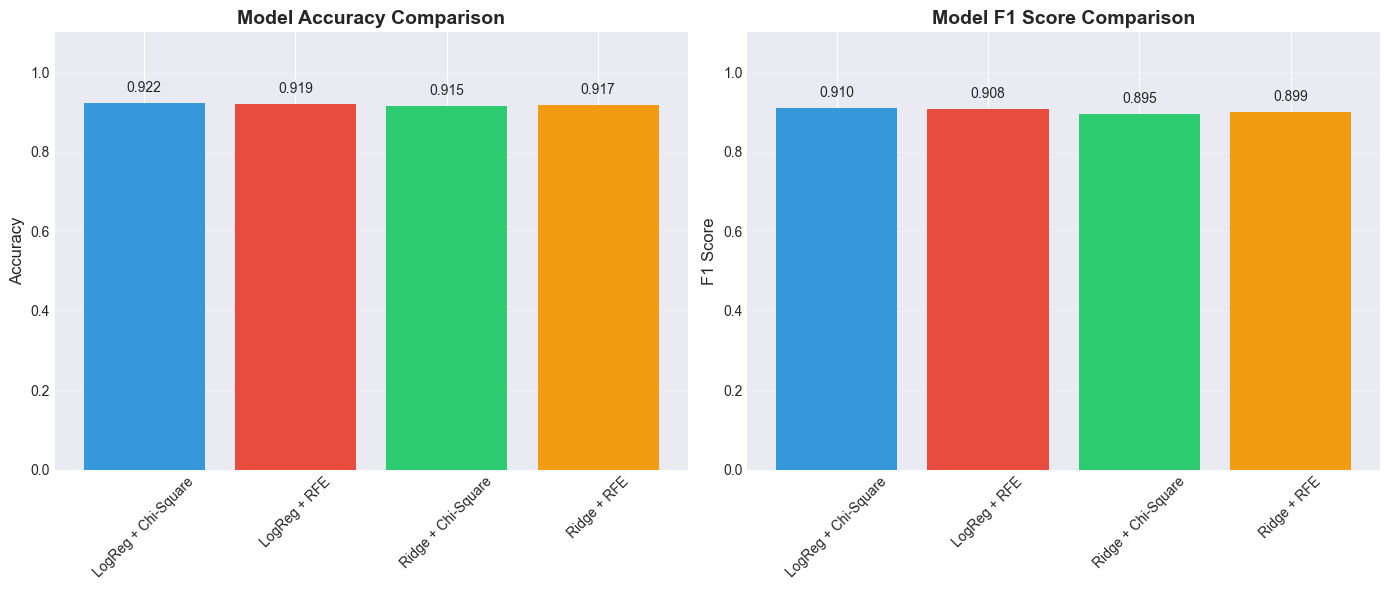


 Confusion Matrices for All Models


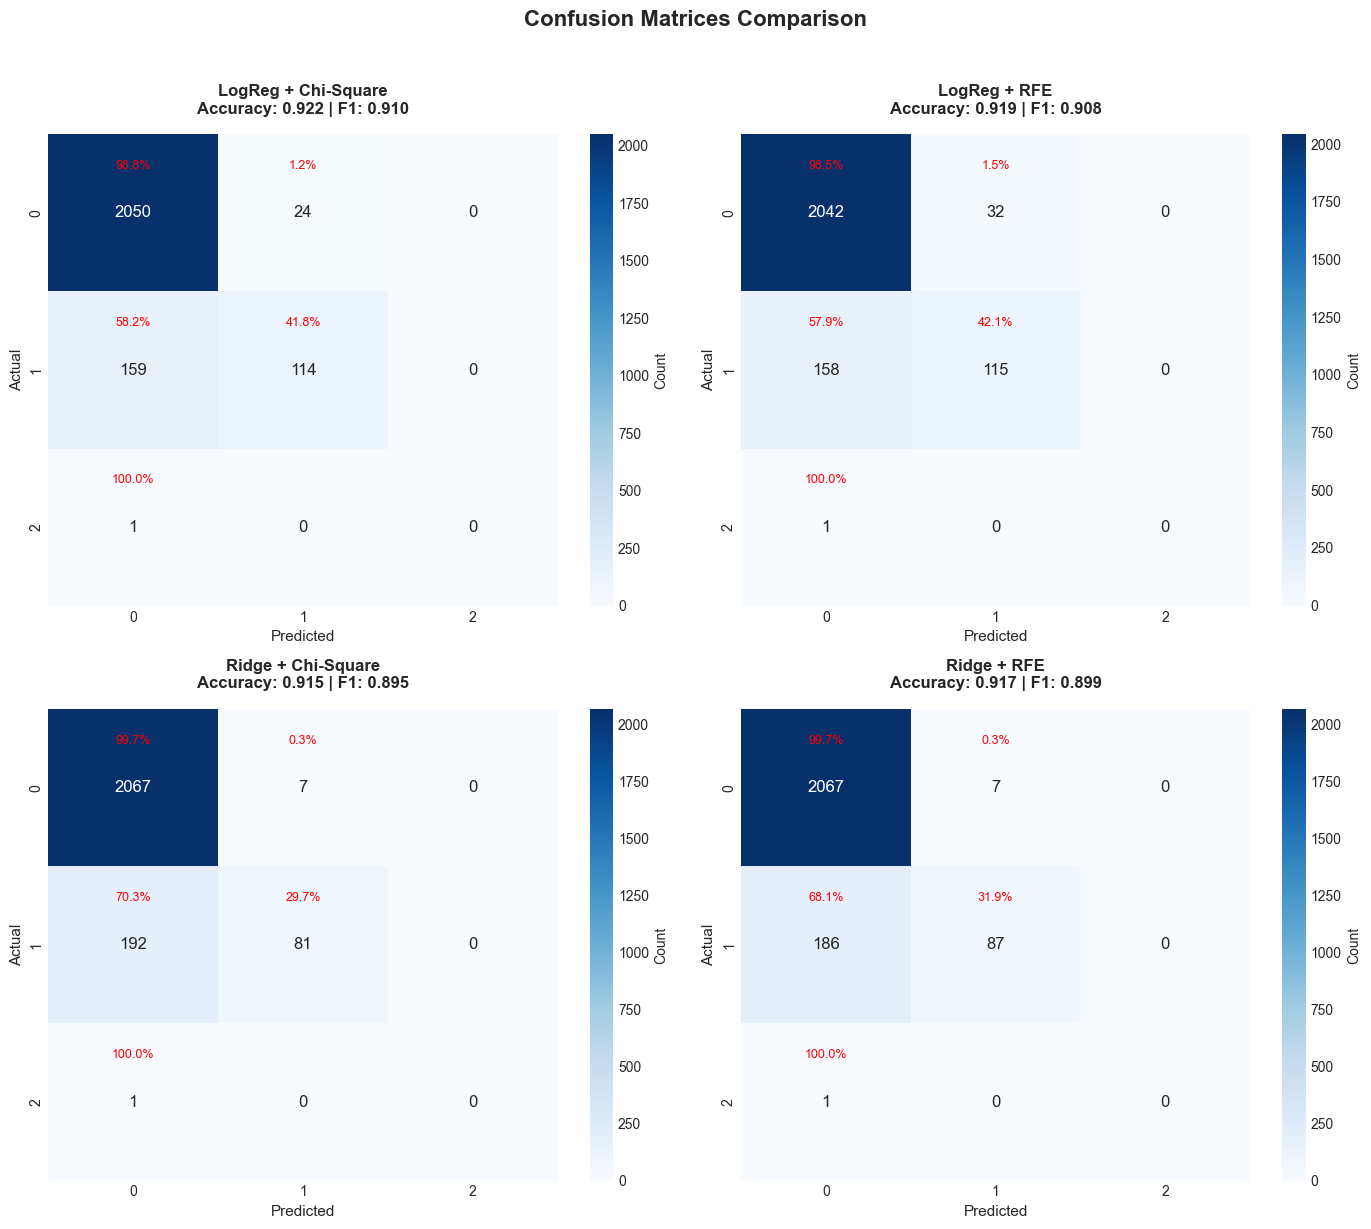


 Normalized Confusion Matrices


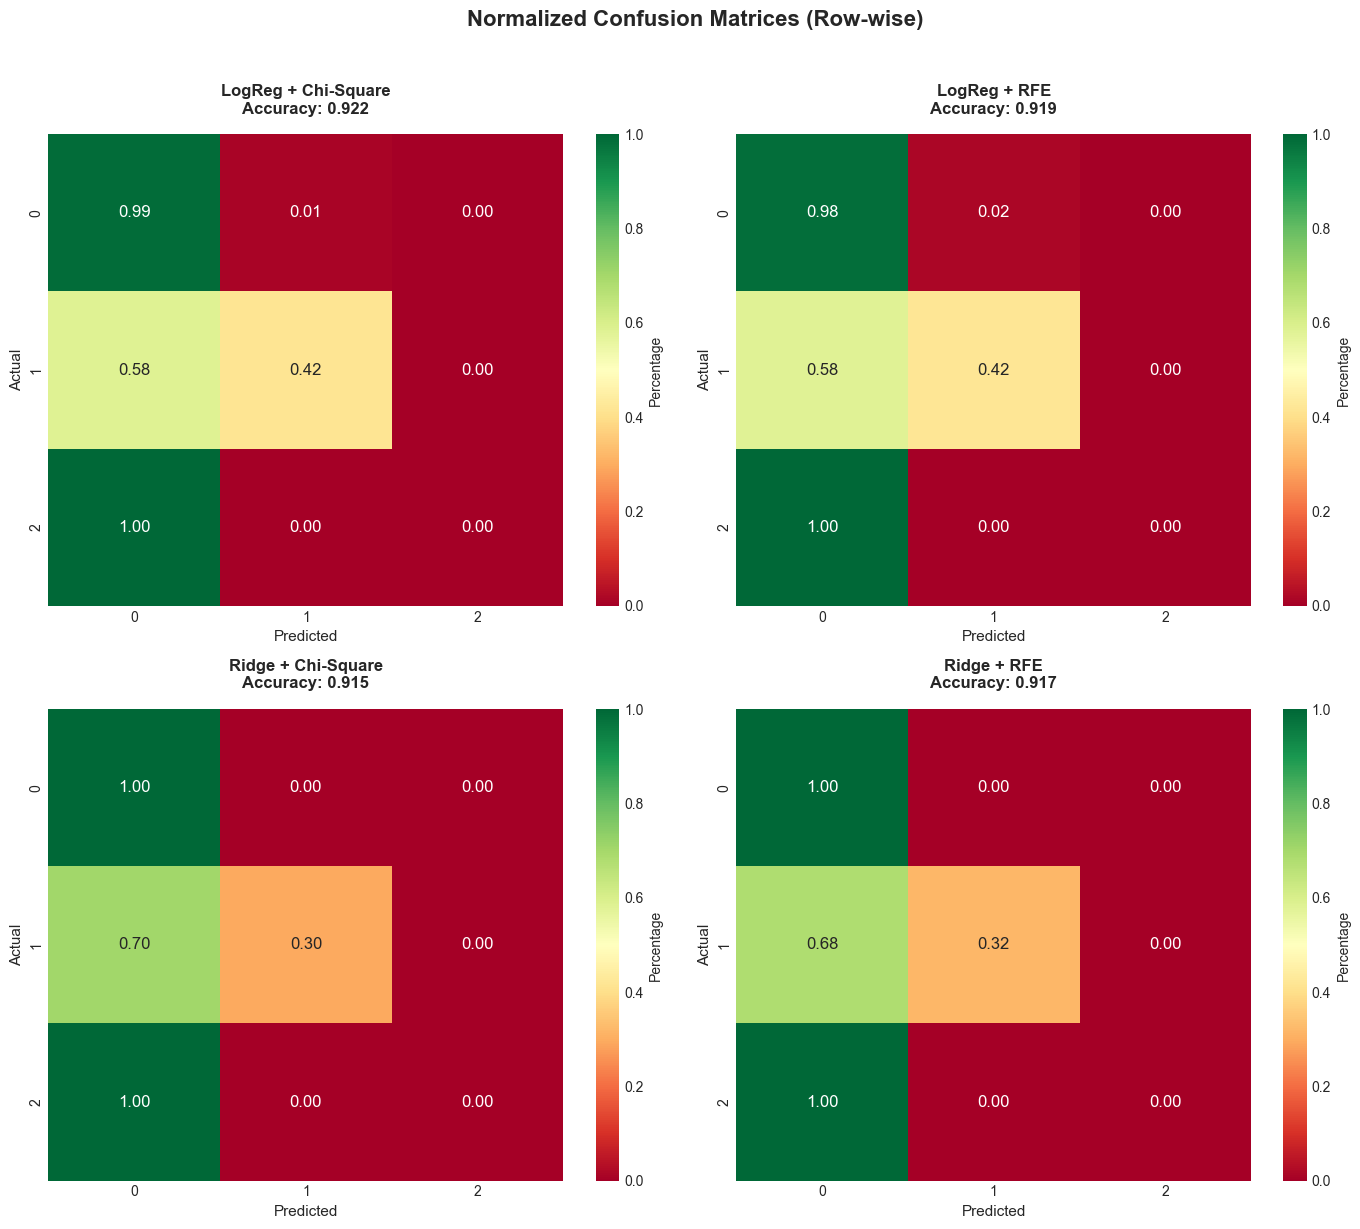


 Top 5 Most Important Features
Available columns in chi_df: ['Feature', 'Chi2_Score', 'p_value', '-log10(p)']


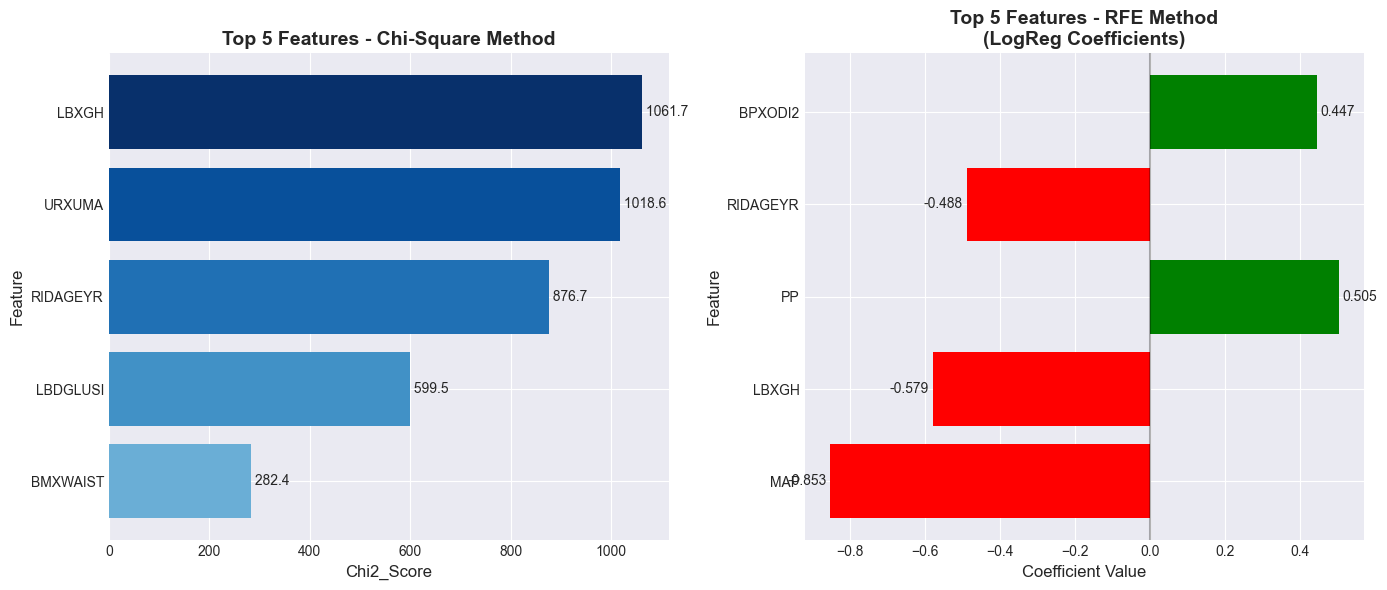


FINAL SUMMARY
 BEST MODEL: LogReg + Chi-Square
   • F1 Score: 0.9099
   • Accuracy: 0.9216
   • Precision: 0.9099
   • Recall: 0.9099

 PERFORMANCE RANKING (by F1 Score):
----------------------------------------------------------------------
Rank  Model                     F1 Score   Accuracy   Status    
----------------------------------------------------------------------
1     LogReg + Chi-Square       0.9099     0.9216     ✓ SUCCESS 
2     LogReg + RFE              0.9075     0.9187     ✓ SUCCESS 
3     Ridge + RFE               0.8988     0.9174     ✓ SUCCESS 
4     Ridge + Chi-Square        0.8947     0.9148     ✓ SUCCESS 

 FEATURE SELECTION SUMMARY:
----------------------------------------
Chi-Square Method:
  • Selected: 10 features
  • Top 3: LBXGH, URXUMA, RIDAGEYR

RFE Method:
  • Selected: 13 features
  • Top 3: RIDAGEYR, INDFMPIR, LBXGH

 FINAL RESULTS TABLE:
--------------------------------------------------------------------------------
              Model  Accuracy  

C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [45]:
# ============================================
# 12. ESSENTIAL VISUALIZATIONS
# ============================================
print("\n" + "="*60)
print("ESSENTIAL VISUALIZATIONS")
print("="*60)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. MODEL PERFORMANCE COMPARISON (Simple bar chart)
if 'results_df' in locals() and not results_df.empty:
    print("\n Model Performance Comparison")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Accuracy Comparison
    bars1 = ax1.bar(results_df['Model'], results_df['Accuracy'], 
                    color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
    ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.set_ylim([0, 1.1])
    ax1.tick_params(axis='x', rotation=45, labelsize=10)
    ax1.grid(axis='y', alpha=0.3)
    
    # Add values on bars
    for bar in bars1:
        height = bar.get_height()
        if not np.isnan(height):
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                     f'{height:.3f}', ha='center', va='bottom', fontsize=10)
    
    # F1 Score Comparison
    bars2 = ax2.bar(results_df['Model'], results_df['F1 Score'],
                    color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
    ax2.set_title('Model F1 Score Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylabel('F1 Score', fontsize=12)
    ax2.set_ylim([0, 1.1])
    ax2.tick_params(axis='x', rotation=45, labelsize=10)
    ax2.grid(axis='y', alpha=0.3)
    
    # Add values on bars
    for bar in bars2:
        height = bar.get_height()
        if not np.isnan(height):
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                     f'{height:.3f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 2. CONFUSION MATRIX FOR ALL 4 MODELS
    print("\n Confusion Matrices for All Models")
    
    # Create figure with 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()
    
    for idx, (model_name, model, X_test) in enumerate(models_to_test):
        try:
            # Make predictions
            pred = model.predict(X_test)
            cm = confusion_matrix(y_test, pred)
            
            # Calculate percentages for annotation
            cm_sum = np.sum(cm, axis=1, keepdims=True)
            cm_percentage = cm / cm_sum.astype(float) * 100
            
            # Create heatmap
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       cbar_kws={'label': 'Count'},
                       ax=axes[idx], annot_kws={"size": 12})
            
            # Add percentage annotations
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    if cm[i, j] > 0:
                        text = axes[idx].text(j + 0.5, i + 0.2, 
                                            f'{cm_percentage[i, j]:.1f}%',
                                            ha="center", va="center", 
                                            color="red", fontsize=9)
            
            # Set title with metrics
            accuracy = accuracy_score(y_test, pred)
            f1 = f1_score(y_test, pred, average='binary') if len(np.unique(y_test)) == 2 else f1_score(y_test, pred, average='weighted')
            
            axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy:.3f} | F1: {f1:.3f}', 
                               fontsize=12, fontweight='bold', pad=15)
            axes[idx].set_xlabel('Predicted', fontsize=11)
            axes[idx].set_ylabel('Actual', fontsize=11)
            
            # Set class labels if binary
            if len(np.unique(y_test)) == 2:
                axes[idx].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
                axes[idx].set_yticklabels(['No Diabetes', 'Diabetes'], rotation=0)
            
        except Exception as e:
            axes[idx].text(0.5, 0.5, f'ERROR:\n{str(e)}', 
                          ha='center', va='center', 
                          transform=axes[idx].transAxes,
                          color='red', fontsize=10)
            axes[idx].set_title(f'{model_name}\nFailed to evaluate', 
                               fontsize=12, fontweight='bold', color='red')
            axes[idx].set_xticks([])
            axes[idx].set_yticks([])
    
    plt.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 3. NORMALIZED CONFUSION MATRICES
    print("\n Normalized Confusion Matrices")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()
    
    for idx, (model_name, model, X_test) in enumerate(models_to_test):
        try:
            # Make predictions
            pred = model.predict(X_test)
            cm = confusion_matrix(y_test, pred)
            
            # Normalize by row (true labels)
            cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            
            # Create heatmap
            sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlGn',
                       vmin=0, vmax=1, cbar_kws={'label': 'Percentage'},
                       ax=axes[idx], annot_kws={"size": 12})
            
            # Set title with metrics
            accuracy = accuracy_score(y_test, pred)
            axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy:.3f}', 
                               fontsize=12, fontweight='bold', pad=15)
            axes[idx].set_xlabel('Predicted', fontsize=11)
            axes[idx].set_ylabel('Actual', fontsize=11)
            
            # Set class labels if binary
            if len(np.unique(y_test)) == 2:
                axes[idx].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)
                axes[idx].set_yticklabels(['No Diabetes', 'Diabetes'], rotation=0)
            
        except Exception as e:
            axes[idx].text(0.5, 0.5, f'ERROR:\n{str(e)}', 
                          ha='center', va='center', 
                          transform=axes[idx].transAxes,
                          color='red', fontsize=10)
            axes[idx].set_title(f'{model_name}\nFailed to evaluate', 
                               fontsize=12, fontweight='bold', color='red')
            axes[idx].set_xticks([])
            axes[idx].set_yticks([])
    
    plt.suptitle('Normalized Confusion Matrices (Row-wise)', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 4. TOP 5 FEATURES FROM EACH METHOD (FIXED VERSION)
    print("\n Top 5 Most Important Features")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Chi-Square Top Features - FIXED COLUMN NAME
    if 'chi_df' in locals() and len(chi_df) >= 5:
        # Check what columns are available in chi_df
        print(f"Available columns in chi_df: {chi_df.columns.tolist()}")
        
        # Try different possible column names
        score_col = None
        for col_name in ['Chi2 Score', 'Chi2_Score', 'Chi2', 'Score', 'chi2']:
            if col_name in chi_df.columns:
                score_col = col_name
                break
        
        if score_col:
            chi_top = chi_df.head(5).sort_values(score_col, ascending=True)
            bars1 = ax1.barh(chi_top['Feature'], chi_top[score_col], 
                            color=plt.cm.Blues(np.linspace(0.5, 1, 5)))
            ax1.set_title('Top 5 Features - Chi-Square Method', fontsize=14, fontweight='bold')
            ax1.set_xlabel(score_col, fontsize=12)
            ax1.set_ylabel('Feature', fontsize=12)
            
            # Add value labels
            for bar in bars1:
                width = bar.get_width()
                ax1.text(width, bar.get_y() + bar.get_height()/2,
                        f' {width:.1f}', ha='left', va='center', fontsize=10)
        else:
            ax1.text(0.5, 0.5, 'Score column not found in chi_df', 
                    ha='center', va='center', transform=ax1.transAxes)
            ax1.set_title('Chi-Square Features\n(Data unavailable)', fontsize=14, fontweight='bold')
    
    # RFE Top Features with coefficients
    if 'logreg_rfe' in locals() and hasattr(logreg_rfe, 'coef_') and 'rfe_selected_features' in locals():
        if len(rfe_selected_features) >= 5:
            coefs = logreg_rfe.coef_[0]
            # Get top 5 features by absolute coefficient
            top_indices = np.argsort(np.abs(coefs))[-5:][::-1]
            top_features = [rfe_selected_features[i] for i in top_indices[:5]]
            top_coefs = coefs[top_indices[:5]]
            
            colors = ['green' if c > 0 else 'red' for c in top_coefs]
            bars2 = ax2.barh(range(5), top_coefs, color=colors)
            ax2.set_title('Top 5 Features - RFE Method\n(LogReg Coefficients)', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Coefficient Value', fontsize=12)
            ax2.set_ylabel('Feature', fontsize=12)
            ax2.set_yticks(range(5))
            ax2.set_yticklabels(top_features, fontsize=10)
            ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            
            # Add value labels
            for i, (bar, coef) in enumerate(zip(bars2, top_coefs)):
                width = bar.get_width()
                position = width + (0.01 if width >= 0 else -0.01)
                ax2.text(position, bar.get_y() + bar.get_height()/2,
                        f'{coef:.3f}', ha='left' if width >= 0 else 'right', 
                        va='center', fontsize=10)
        else:
            ax2.text(0.5, 0.5, 'Not enough RFE features', 
                    ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title('RFE Features\n(Data unavailable)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 5. FINAL SUMMARY
    print("\n" + "="*60)
    print("FINAL SUMMARY")
    print("="*60)
    
    # Best model info
    if not results_df['F1 Score'].isna().all():
        best_idx = results_df['F1 Score'].idxmax()
        best_model = results_df.loc[best_idx, 'Model']
        best_f1 = results_df.loc[best_idx, 'F1 Score']
        best_acc = results_df.loc[best_idx, 'Accuracy']
        
        print(f" BEST MODEL: {best_model}")
        print(f"   • F1 Score: {best_f1:.4f}")
        print(f"   • Accuracy: {best_acc:.4f}")
        if 'Precision' in results_df.columns:
            print(f"   • Precision: {results_df.loc[best_idx, 'Precision']:.4f}")
        if 'Recall' in results_df.columns:
            print(f"   • Recall: {results_df.loc[best_idx, 'Recall']:.4f}")
    
    # Performance comparison table
    print(f"\n PERFORMANCE RANKING (by F1 Score):")
    print("-" * 70)
    print(f"{'Rank':<5} {'Model':<25} {'F1 Score':<10} {'Accuracy':<10} {'Status':<10}")
    print("-" * 70)
    
    ranked = results_df.sort_values('F1 Score', ascending=False)
    for i, (_, row) in enumerate(ranked.iterrows(), 1):
        status = "✓ SUCCESS" if not np.isnan(row['F1 Score']) else "✗ FAILED"
        f1_display = f"{row['F1 Score']:.4f}" if not np.isnan(row['F1 Score']) else "N/A"
        acc_display = f"{row['Accuracy']:.4f}" if not np.isnan(row['Accuracy']) else "N/A"
        
        print(f"{i:<5} {row['Model']:<25} {f1_display:<10} {acc_display:<10} {status:<10}")
    
    # Feature selection summary
    print(f"\n FEATURE SELECTION SUMMARY:")
    print("-" * 40)
    if 'chi_selected_features' in locals():
        print(f"Chi-Square Method:")
        print(f"  • Selected: {len(chi_selected_features)} features")
        if len(chi_selected_features) >= 3:
            print(f"  • Top 3: {', '.join(chi_selected_features[:3])}")
    
    if 'rfe_selected_features' in locals():
        print(f"\nRFE Method:")
        print(f"  • Selected: {len(rfe_selected_features)} features")
        if len(rfe_selected_features) >= 3:
            print(f"  • Top 3: {', '.join(rfe_selected_features[:3])}")
    
    print("="*60)

else:
    print(" No results available for visualization.")

# Display final results table
print("\n FINAL RESULTS TABLE:")
if 'results_df' in locals():
    print("-" * 80)
    print(results_df.to_string(index=False, float_format=lambda x: f'{x:.4f}' if pd.notnull(x) else 'N/A'))
    print("-" * 80)